第1问

In [17]:
import pandas as pd
import numpy as np
data =[[1,2,1],
       [2,3,1],
       [3,3,1],
       [4,5,1],
       [5,5,1],
       [1,0,2],
       [2,1,2],
       [3,1,2],
       [3,2,2],
       [5,3,2],
       [6,5,2]]
df = pd.DataFrame(data,columns=['X','Y','target'])
df_X=df[['X','Y']]
X=df_X.to_numpy()
df_Y=df[['target']]
Y=df_Y.to_numpy()
c_1=X[0:5][:]
c_2=X[5:-1][:]

In [18]:
def cal_cov_and_avg(samples):
    """
    给定一个类别的数据，计算协方差矩阵和平均向量
    :param samples: 
    :return: 
    """
    u1 = np.mean(samples, axis=0)
    cov_m = np.zeros((samples.shape[1], samples.shape[1]))
    for s in samples:
        t = s - u1
        cov_m += t * t.reshape(2, 1)
    return cov_m, u1


def fisher(c_1, c_2):
    """
    fisher算法实现(请参考上面推导出来的公式，那个才是精华部分)
    :param c_1: 
    :param c_2: 
    :return: 
    """
    cov_1, u1 = cal_cov_and_avg(c_1)
    cov_2, u2 = cal_cov_and_avg(c_2)
    s_w = cov_1 + cov_2
    u, s, v = np.linalg.svd(s_w)  # 奇异值分解
    s_w_inv = np.dot(np.dot(v.T, np.linalg.inv(np.diag(s))), u.T)
    return np.dot(s_w_inv, u1 - u2)

In [19]:
def judge(sample, w, c_1, c_2):
    """
    true 属于1
    false 属于2
    :param sample:
    :param w:
    :param center_1:
    :param center_2:
    :return:
    """
    u1 = np.mean(c_1, axis=0)
    u2 = np.mean(c_2, axis=0)
    center_1 = np.dot(w.T, u1)
    center_2 = np.dot(w.T, u2)
    pos = np.dot(w.T, sample)
    return abs(pos - center_1) < abs(pos - center_2)


w = fisher(c_1, c_2)  # 调用函数，得到参数w
out = judge(c_1[1], w, c_1, c_2)   # 判断所属的类别
print(out)

True


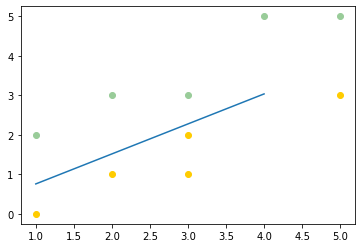

In [20]:
import matplotlib.pyplot as plt

plt.scatter(c_1[:, 0], c_1[:, 1], c='#99CC99')
plt.scatter(c_2[:, 0], c_2[:, 1], c='#FFCC00')
line_x = np.arange(min(np.min(c_1[:, 0]), np.min(c_2[:, 0])),
                   max(np.max(c_1[:, 0]), np.max(c_2[:, 0])),
                   step=1)

line_y = - (w[0] * line_x) / w[1]
plt.plot(line_x, line_y)
plt.show()

第3问

In [4]:
from sklearn import discriminant_analysis
#定义Fisher分类器对象fisher_clf
fisher_clf = discriminant_analysis.LinearDiscriminantAnalysis()
#调用该对象的训练方法
fisher_clf.fit(X,Y)

h:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [5]:
y_pred=fisher_clf.predict(X)
print('测试数据集的正确标签为:',Y)
print('测试数据集的预测标签为:',y_pred)
from sklearn.metrics import accuracy_score
testing_acc=accuracy_score(Y, y_pred)*100
print('Fisher线性分类器测试准确率: {:.2f}%'.format(testing_acc))

测试数据集的正确标签为: [[1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]
测试数据集的预测标签为: [1 1 1 1 1 2 2 2 2 2 2]
Fisher线性分类器测试准确率: 100.00%
